In [118]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
plt.style.use('fivethirtyeight')

In [104]:
# # loading the data
# from google.colab import files
# uploaded = files.upload()

In [105]:
#storing and showing the data
df = pd.read_csv('FB_stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,2019-05-02,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,2019-05-03,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
5,2019-05-08,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
6,2019-05-09,187.199997,189.770004,186.259995,188.649994,188.649994,12967000
7,2019-05-10,188.250000,190.000000,184.589996,188.339996,188.339996,12578500
8,2019-05-13,183.500000,185.429993,180.839996,181.539993,181.539993,16833300
9,2019-05-14,182.520004,183.490005,178.100006,180.729996,180.729996,17628100


In [106]:
# get the number of rows and columns 
df.shape

(22, 7)

In [107]:
## our model will predict the stock value for  last day and testing parameter is adjusted close price

In [108]:
#Get and print the last row of data

actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
21,2019-05-31,180.279999,180.539993,177.160004,177.470001,177.470001,15226500


In [109]:
#prepare the data for training thr svr models
# get all of the data except last row
df = df.head(len(df)-1)

#new dataset
print(df)

          Date        Open        High  ...       Close   Adj Close    Volume
0   2019-05-01  194.779999  196.179993  ...  193.029999  193.029999  15996600
1   2019-05-02  193.000000  194.000000  ...  192.529999  192.529999  13209500
2   2019-05-03  194.380005  196.160004  ...  195.470001  195.470001  14575400
3   2019-05-06  191.240005  194.279999  ...  193.880005  193.880005  13994900
4   2019-05-07  192.539993  192.899994  ...  189.770004  189.770004  16253000
5   2019-05-08  189.389999  190.720001  ...  189.539993  189.539993  12505700
6   2019-05-09  187.199997  189.770004  ...  188.649994  188.649994  12967000
7   2019-05-10  188.250000  190.000000  ...  188.339996  188.339996  12578500
8   2019-05-13  183.500000  185.429993  ...  181.539993  181.539993  16833300
9   2019-05-14  182.520004  183.490005  ...  180.729996  180.729996  17628100
10  2019-05-15  180.419998  187.279999  ...  186.270004  186.270004  16746900
11  2019-05-16  185.050003  188.580002  ...  186.990005  186.990

In [110]:
# create empty list to store the independent and dependent data
days = []
adj_close_prices=[]

In [111]:
# get the data and adjusted close prices

#loc = label based, we need to have to specify rows and columns based on their row and column labels
#iloc = integer based, iloc is integer position-based, so you have to specify rows and columns by their integer position values
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close']

print('days:',df_days)
print("Adjusted close price:",df_adj_close)


# #Alternatively
# df_days = df.iloc[:,0]
# df_adj_close = df.iloc[:,-2]

# print('days:',df_days)
# print("Adjusted close price:",df_adj_close)

days: 0     2019-05-01
1     2019-05-02
2     2019-05-03
3     2019-05-06
4     2019-05-07
5     2019-05-08
6     2019-05-09
7     2019-05-10
8     2019-05-13
9     2019-05-14
10    2019-05-15
11    2019-05-16
12    2019-05-17
13    2019-05-20
14    2019-05-21
15    2019-05-22
16    2019-05-23
17    2019-05-24
18    2019-05-28
19    2019-05-29
20    2019-05-30
Name: Date, dtype: object
Adjusted close price: 0     193.029999
1     192.529999
2     195.470001
3     193.880005
4     189.770004
5     189.539993
6     188.649994
7     188.339996
8     181.539993
9     180.729996
10    186.270004
11    186.990005
12    185.300003
13    182.720001
14    184.820007
15    185.320007
16    180.869995
17    181.059998
18    184.309998
19    182.190002
20    183.009995
Name: Adj Close, dtype: float64


In [112]:
# create the independent data set

for day in df_days:
  days.append( [int(day.split('-')[2])]) 
  
  #we add only day and not whole date


# create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))




In [113]:
#print the days and adj close prices
print(days)
print(adj_close_prices)




[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30]]
[193.029999, 192.529999, 195.470001, 193.880005, 189.770004, 189.53999299999998, 188.649994, 188.33999599999999, 181.53999299999998, 180.729996, 186.270004, 186.990005, 185.300003, 182.720001, 184.820007, 185.320007, 180.869995, 181.059998, 184.309998, 182.190002, 183.009995]


In [127]:
#Create a 3 Support vector regrresiion model
import warnings
from scipy import sparse
from sklearn.neighbors import kneighbors_graph

#crerate and train a SVR model using a linear kernel

lin_svr = SVR(kernel = 'linear',C=1000.0)
lin_svr.fit(days,adj_close_prices)

#create and train svr model using a polynomial kernel

poly_svr = SVR(kernel='poly',C=1000.0,degree=2)
poly_svr.fit(days, adj_close_prices)

#create and train svr model using rbf kernel
rbf_svr = SVR(kernel='rbf',C=1000.0,gamma=0.15)
rbf_svr.fit(days, adj_close_prices)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

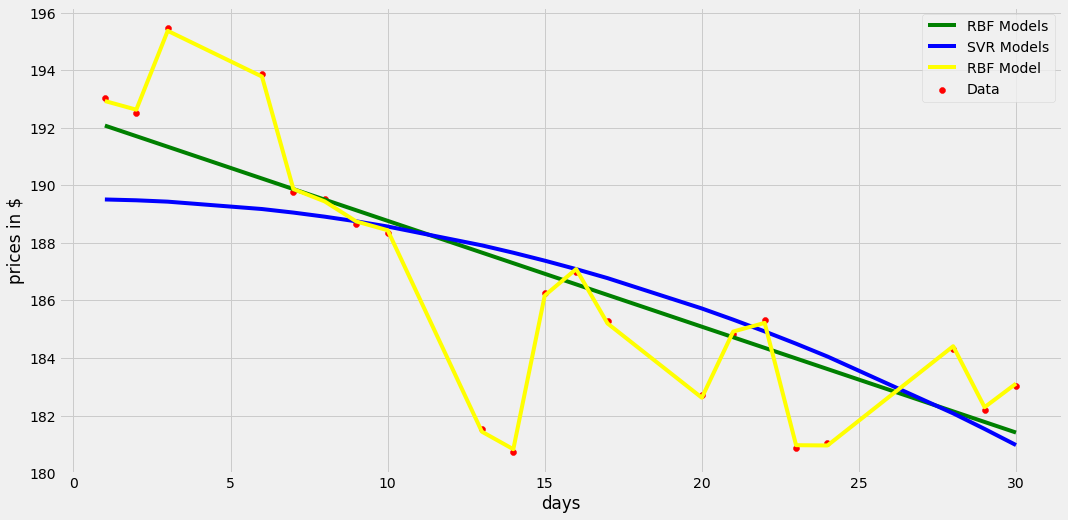

In [133]:
#Plot the models on a graph to see which has the best fit for original data

plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_prices,color='red',label='Data')
plt.plot(days,lin_svr.predict(days),color='green',label='RBF Models')
plt.plot(days,poly_svr.predict(days),color = 'blue',label='SVR Models')
plt.plot(days,rbf_svr.predict(days),color = 'yellow',label='RBF Model')

plt.xlabel('days')
plt.ylabel('prices in $')
plt.legend()
plt.show()


In [138]:
# show the predicted price of the given day

day =[[31]]
print("The RBF SVR predicted:",rbf_svr.predict(day))
print("The Linear svr model predicted ",lin_svr.predict(day))
print('The Polynomial SVR Predicted :', poly_svr.predict(day))


#Printing  the actual price 
print("The actual price was",actual_price['Adj Close'][21])


The RBF SVR predicted: [185.04587695]
The Linear svr model predicted  [181.04143771]
The Polynomial SVR Predicted : [180.39533267]
The actual price was 177.470001
